In [1]:
# Age (numeric)(age could be )
# Sex (text: male, female) (could be a different löne skillnader)
# Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)(effect the salary)
# Housing (text: own, rent, or free)
# Saving accounts (text - little, moderate, quite rich, rich)
# Checking account (numeric, in DM - Deutsch Mark)
# Credit amount (numeric, in DM)
# Duration (numeric, in month)
# Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
# Risk - creditworthiness: good or bad

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mpl

In [2]:
df = pd.read_csv("german_credit_data.csv")

In [3]:
df.describe(include = "O")

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,817,606,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,603,274,337,700


In [4]:
df.groupby("Risk").mean()

,Unnamed: 0,Age,Job,Credit amount,Duration
Risk,,,,,
bad,514.76,33.963333,1.936667,3938.126667,24.860000
good,492.96,36.224286,1.890000,2985.457143,19.207143


In [5]:
target_col = "Risk"

## Split X | y

In [6]:
X = df.drop(target_col, axis = 1)

y = df[target_col]

In [7]:
y = y.map({"good":0,"bad":1})

## Creating pipe line

In [8]:
from sklearn.pipeline import make_pipeline

In [9]:
from sklearn.impute import SimpleImputer

# Scale nummerical features (keep in mind that where are multiple different scaling methods/algos)
from sklearn.preprocessing import MinMaxScaler

# OneHotEncoder creates dummies (compare to pd.get_dummies)
from sklearn.preprocessing import OneHotEncoder

In [10]:
num_trans = make_pipeline(SimpleImputer(strategy = "median"),
                         MinMaxScaler())
# impute & OneHotEncoder for cat cols
# notice impute strategy & fill_value!
    # We are not imputing mean or median (wouldn't make much sense)
# Here we are not scaling the categorical data
cat_trans = make_pipeline(SimpleImputer(strategy = "constant", fill_value = "missing"),
                         OneHotEncoder(handle_unknown = "ignore"))

In [11]:
num_cols = X.select_dtypes(include = "number").columns

In [12]:
cat_cols = X.select_dtypes(include = "O").columns

In [13]:
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer((num_trans, num_cols),(cat_trans,cat_cols))

In [14]:
X_preprocessed = preprocessor.fit_transform(X)

In [15]:
preprocessor_memory = preprocessor.fit(X)

In [16]:
from sklearn.model_selection import train_test_split

# This order matters
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed,y, test_size = 0.20)

In [17]:
X.select_dtypes("O").columns

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object')

## Importing and training the model

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [19]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB()]

In [20]:
from sklearn.model_selection import cross_validate


In [21]:
for i in classifiers:
    cv_results = cross_validate(i, X_train, y_train, cv = 5, scoring = "recall",)
    print(i)
    print("")
    print(cv_results.get("test_score").mean())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

0.48270120259019417
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.35

## Grid search for RandomForest

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
classifier = RandomForestClassifier(n_estimators = 20, criterion = "entropy")

In [24]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
parameters = [{"n_estimators": [3,5,8,10,20,25,30,40,50,75],
               "criterion":["gini", "entropy"],
               "min_samples_leaf": [1,2,3,4,5],
               "max_depth": [None, 1,2,3]}]

In [26]:
grid_search = GridSearchCV(estimator=classifier,
                          param_grid = parameters,
                          scoring = "accuracy",
                          cv = 5,
                          n_jobs = -1)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

In [28]:
grid_search.fit(X_train, y_train)
accuracy = grid_search.best_score_
best_params = grid_search.best_params_


print("accuracy: ", accuracy)
print("Param combo: ", best_params)

accuracy:  0.755
Param combo:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'n_estimators': 75}


In [29]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 3,
 'n_estimators': 75}

In [30]:
# Add .best_estimator_ to find the best model
End_model = grid_search.best_estimator_

## Grid search for  SVC( ) 

In [31]:
param_grid = [{"C":[0.5,1,2,3],
              "kernel": ["linear","rbf"]}]

In [32]:
grid = GridSearchCV(SVC(probability = True), param_grid = param_grid, scoring = "recall", cv = 5)

In [33]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.5, 1, 2, 3], 'kernel': ['linear', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [34]:
SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
grid.best_params_

{'C': 3, 'kernel': 'linear'}

In [36]:
grid.best_score_

0.3493987049028677

In [37]:
best_model = grid.best_estimator_

In [38]:
#best_model.predict_proba(X_train)

In [39]:
best_model

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [40]:
def classifier_penguins_pipeline(def_model, def_X):
    
    def_X = preprocessor_memory.transform(def_X)
    
    def_y_pred = def_model.predict(def_X)
    
    
    return def_y_pred

## Testing

In [41]:
End_model.score(X_test, y_test)

0.685

In [42]:
# Här testar vi våran besta modell. Som vi har hittat genom gridsearch
y_pred = End_model.predict(X_test)

In [43]:
# False negative sämst för bolaget.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[120  12]
 [ 51  17]]


In [44]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       132
           1       0.59      0.25      0.35        68

    accuracy                           0.69       200
   macro avg       0.64      0.58      0.57       200
weighted avg       0.66      0.69      0.64       200



<AxesSubplot:>

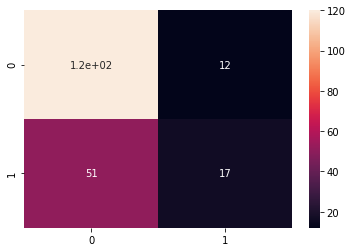

In [45]:
sns.heatmap(cm, annot=True)

## SVC() testing

In [47]:
best_model.score(X_test,y_test)

0.7

In [48]:
y_pred2 = best_model.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred2)

print(cm)

[[118  14]
 [ 46  22]]


In [50]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred2)

print(cr)

              precision    recall  f1-score   support

           0       0.72      0.89      0.80       132
           1       0.61      0.32      0.42        68

    accuracy                           0.70       200
   macro avg       0.67      0.61      0.61       200
weighted avg       0.68      0.70      0.67       200



In [51]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(GaussianNB(), X_train, y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)

print(conf_mat)


[[338 230]
 [ 70 162]]


In [55]:
from sklearn.metrics import classification_report

cr = classification_report(y_train, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.83      0.60      0.69       568
           1       0.41      0.70      0.52       232

    accuracy                           0.62       800
   macro avg       0.62      0.65      0.61       800
weighted avg       0.71      0.62      0.64       800



In [53]:
model = cross_validate(GaussianNB(), X_train, y_train, cv = 5, scoring = "recall")

In [54]:
model

{'fit_time': array([0.00135016, 0.00105309, 0.00094318, 0.00102901, 0.00105906]),
 'score_time': array([0.00159883, 0.00118899, 0.000947  , 0.00131679, 0.00096893]),
 'test_score': array([0.63829787, 0.63829787, 0.86956522, 0.65217391, 0.69565217])}